# Unsupervised learning

A group of ML algorithms that find pattern in data. The data has not been labeled, classified or characterized.

## Clustering

Grouping items with similar characteristics, example, distance between 2 points on a 2D plane.

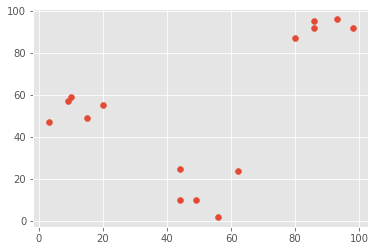

In [2]:
# librarys
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10] 

plt.scatter(x_coordinates, y_coordinates)
plt.show()

# there are three cluster in the datas 

## Basic of cluster analysis

1. Cluster: group of items with similar characteristics

Algorithms: Hierarchical clustering, K-Means clustering, DBSCAN, Gaussian methods...

**Hierarchical algorithm description:**

1. Todos pontos são considerados agrupamentos individuais;
2. Calcula-se o cluster center, que é uma média dos atributos de todos os pontos de dados de um cluster, esses atributos pode ser, por exemplo, a média das coordenadas x e y
3. Depois, a distância entre todos os pares de clusters center são calculadas e os dois cluster mais próximos são mesclados, isso acontece até o fim do algoritmo

<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

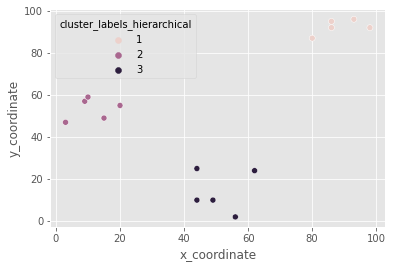

In [3]:
# hierarchical clustering example with scipy
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'x_coordinate': x_coordinates,
                   'y_coordinate': y_coordinates})

Z = linkage(df, 'ward')
df['cluster_labels_hierarchical'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x = 'x_coordinate', y = 'y_coordinate',
               hue = 'cluster_labels_hierarchical', data = df)


**KMeans algorithm description:**

1. São criados três clusters center aleatório
2. Calcula-se a distância de cada ponto mais próximo do cluster center criado
3. Assim, cluster center são recalculados, e se faz tudo novamente


<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

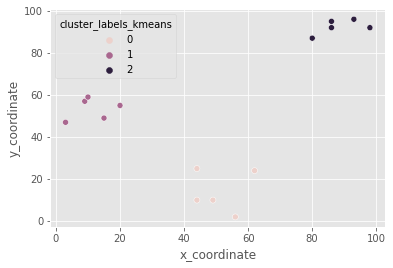

In [4]:
# example with scipy again
from scipy.cluster.vq import kmeans, vq
import random

random.seed((1000, 2000))

df[['x_coordinate', 'y_coordinate']] = df[['x_coordinate', 'y_coordinate']].astype(float)

centroids, _ = kmeans(df[['x_coordinate', 'y_coordinate']], 3)
df['cluster_labels_kmeans'], _ = vq(df[['x_coordinate', 'y_coordinate']], centroids)

sns.scatterplot(x='x_coordinate', y = 'y_coordinate',
               hue = 'cluster_labels_kmeans', data = df)

### Data preparation

 **Normalization**: process of rescaling data to a std of 1. Reduzir a variância dos dados
 
 > x_new = x / std_dev(x)

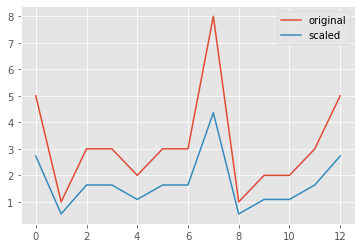

In [5]:
from scipy.cluster.vq import whiten # branquear

data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]

scaled_data = whiten(data)

plt.plot(data,
        label = 'original')

plt.plot(scaled_data,
        label = 'scaled')

plt.legend()
plt.show()

Normalization of small numbers

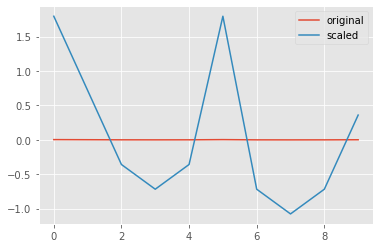

In [6]:
#mudança nas taxas de juros no país Bangalla
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

## Hierarchical clustering

1. Calcular a matriz de distância em cada estágio. isso é feito com o método *linkage*

- method: how to calculate the proximity of cluster
- metric: euclidean is a straight line distance between 2 points on a 2D plane, pode ser usada uma função

```python
import scipy

scipy.cluster.hierarchy.linkage(observations,
                               method = 'single',  
                               metric = 'euclidean',
                               optimal_ordering= False)

```

Aprofundando em method:

- single: based on two closest objects
- complete: based on two farthest objects
- average: arithmetic mean
- centroid: geometric mean
- median: --
- ward: based on the sum of squares - grupos mais concêntricos em relação ao seu centro

2. Criando os clusters labels com fcluster

```python

scipy.cluster.hierarchy.fcluster(distance_matrix,
                                 num_clusters,
                                 criterion)
``` 
- criterion: formar cluster com base em determinado limites

In [7]:
# warning ignore
pd.options.mode.chained_assignment = None

# df
df_hierarchical = df[['x_coordinate', 'y_coordinate']]

# function
def plot_hierarchical_cluster(df):
   
    methods = ['single', 'complete', 'centroid', 'ward', 'average', 'median']

    for m in methods:
        
        Z = linkage(df, m)

        df[f'cluster_labels_{m}'] = fcluster(Z, 3, criterion='maxclust')

    
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    sns.scatterplot(ax = axes[0, 0], x = 'x_coordinate', y = 'y_coordinate', 
                    hue = f'cluster_labels_single', data = df)

    sns.scatterplot(ax = axes[0, 1], x = 'x_coordinate', y = 'y_coordinate',
                    hue = f'cluster_labels_complete', data = df)

    sns.scatterplot(ax = axes[0,2], x = 'x_coordinate', y = 'y_coordinate', 
                    hue = f'cluster_labels_median', data = df)

    sns.scatterplot(ax = axes[1, 0], x = 'x_coordinate', y = 'y_coordinate', 
                    hue = f'cluster_labels_ward', data = df)

    sns.scatterplot(ax = axes[1, 1], x = 'x_coordinate', y = 'y_coordinate', 
                    hue = f'cluster_labels_average', data = df)

    sns.scatterplot(ax = axes[1,2], x = 'x_coordinate', y = 'y_coordinate', 
                    hue = f'cluster_labels_centroid', data = df)

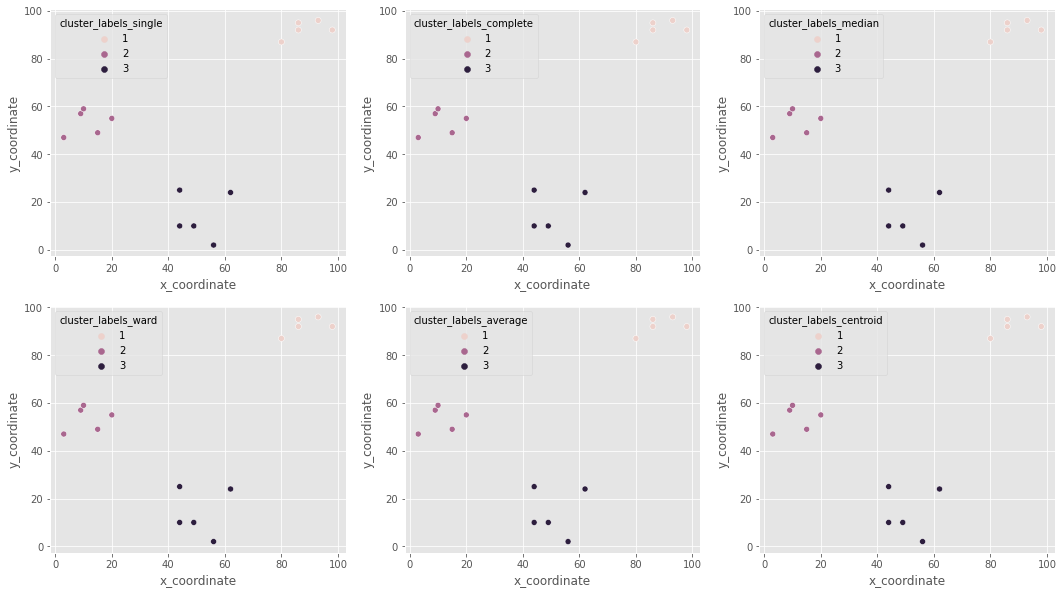

In [8]:
plot_hierarchical_cluster(df_hierarchical)

## How many cluster

Qual a estratégia para decidir o n_cluster? Através de dendrograms, que nos ajuda mostrando *progressions as clusters are merged*.

Se fosse cruzar uma linha horizontal em qualquer parte do gráfico, o número de linhas cortadas é o número de clusters nessa fase, e a  distância entre essas linhas indica a distância entre os agrupamentos.

Esse método possue limitações, como exemplo:
 - Tempo de execução, que inviabiliza a técnica para grandes quantidades de dados

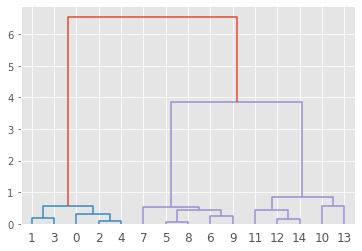

In [9]:
from cluster_two import ClusterTwo
from scipy.cluster.hierarchy import dendrogram

# getting df with x and y scaled
df_test = df[['x_coordinate', 'y_coordinate']]

c_test = ClusterTwo(df_test)
c_normalized = c_test.normalization('x_coordinate', 'y_coordinate')


Z = linkage(c_normalized[['scaled_x_coordinate', 'scaled_y_coordinate']],
           method = 'ward',
           metric = 'euclidean')

dn = dendrogram(Z)
plt.show()

In [10]:
# fiding cluster centers of each cluster

c_normalized['cluster_labels'] = fcluster(Z, 2, criterion = 'maxclust')

print(c_normalized[['scaled_x_coordinate', 
                    'scaled_y_coordinate', 
                    'cluster_labels']].groupby('cluster_labels').mean())

                scaled_x_coordinate  scaled_y_coordinate
cluster_labels                                          
1                          2.755211             2.843294
2                          0.970232             1.040079
